<a href="https://colab.research.google.com/github/MariPron/My_First_Repo/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#[1] Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [2]:
# [2] Получение данных с сайта Системного оператора ЕЭС
id_table = 0
df_power = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=01.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]
df_2 = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=02.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]
df_3 = (pd.read_html("https://so-ups.ru/index.php?id=972&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=03.05.2020", header = 0, index_col = 0)[id_table]).iloc[: - 1]


df_power = df_power.append(df_2)
df_power = df_power.append(df_3)

df_power

,Мощность генерации (МВт),Мощность потребления (МВт)
Время Мск,,
01-05-2020 00:00,4211,3907
01-05-2020 01:00,4384,4077
01-05-2020 02:00,4599,4285
01-05-2020 03:00,4704,4390
01-05-2020 04:00,4826,4512
...,...,...
03-05-2020 19:00,4093,3752
03-05-2020 20:00,3989,3647
03-05-2020 21:00,4066,3700


In [3]:
#[3] Определим разность генерации и потребления
df_power['Разность (МВт)'] = df_power.iloc[: , 0] - df_power.iloc[:, 1] 
df_power

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт)
Время Мск,,,
01-05-2020 00:00,4211,3907,304
01-05-2020 01:00,4384,4077,307
01-05-2020 02:00,4599,4285,314
01-05-2020 03:00,4704,4390,314
01-05-2020 04:00,4826,4512,314
...,...,...,...
03-05-2020 19:00,4093,3752,341
03-05-2020 20:00,3989,3647,342
03-05-2020 21:00,4066,3700,366


In [4]:
#[4] Добавление столбца
id_table = 0
df_freq = (pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=01.05.2020", header = 0, index_col = 0)[id_table]).iloc[:-1]
df_freq = (df_freq.append(pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=02.05.2020", header = 0, index_col = 0)[id_table])).iloc[:-1]
df_freq = (df_freq.append(pd.read_html("https://so-ups.ru/index.php?id=971&tx_ms1cdu_pi1%5Bkpo%5D=540000&tx_ms1cdu_pi1%5Bdt%5D=03.05.2020", header = 0, index_col = 0)[id_table])).iloc[:-1]

df_power_freq = df_power.join(df_freq)
df_power_freq

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт),"Частота, Гц"
Время Мск,,,,
01-05-2020 00:00,4211,3907,304,50.00
01-05-2020 01:00,4384,4077,307,50.04
01-05-2020 02:00,4599,4285,314,49.97
01-05-2020 03:00,4704,4390,314,50.04
01-05-2020 04:00,4826,4512,314,50.05
...,...,...,...,...
03-05-2020 19:00,4093,3752,341,50.04
03-05-2020 20:00,3989,3647,342,50.02
03-05-2020 21:00,4066,3700,366,50.02


In [5]:
#[5] Сортировка данных
df_power_freq = df_power_freq.sort_values(['Мощность генерации (МВт)'],  ascending = False)
df_power_freq

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт),"Частота, Гц"
Время Мск,,,,
01-05-2020 14:00,5281,4536,745,50.05
01-05-2020 15:00,5278,4528,750,50.06
01-05-2020 06:00,5218,4507,711,50.03
01-05-2020 08:00,5178,4430,748,50.03
02-05-2020 14:00,5166,4384,782,50.00
...,...,...,...,...
03-05-2020 21:00,4066,3700,366,50.02
03-05-2020 23:00,4054,3687,367,50.09
02-05-2020 21:00,4021,3658,363,49.96


In [6]:
#[6] Выбор фрагмента таблицы по условию
# Выбрать электростанции с частотой >50.05 или <49.95
v_min=49.95 #Нижняя граница частоты
v_max=50.05 #верхняя граница частоты
df_power_freq[(df_power_freq['Частота, Гц'] < v_min) | (df_power_freq['Частота, Гц'] > v_max)]

,Мощность генерации (МВт),Мощность потребления (МВт),Разность (МВт),"Частота, Гц"
Время Мск,,,,
01-05-2020 15:00,5278,4528,750,50.06
01-05-2020 09:00,5157,4414,743,49.91
01-05-2020 13:00,5104,4355,749,50.06
01-05-2020 05:00,4969,4460,509,49.91
02-05-2020 12:00,4908,4109,799,49.94
02-05-2020 17:00,4645,4179,466,49.93
03-05-2020 17:00,4462,3986,476,49.94
02-05-2020 18:00,4375,4008,367,49.94
03-05-2020 18:00,4300,3921,379,50.06


In [7]:
#[7] Выбор фрагмента таблицы по номерам строк и столбцов
# 7.1. Через имя столбца или столбцов
print('все данные из столбцов \'Мощность генерации (МВт)\' и \'Разность (МВт)\'')
print(df_power_freq[['Мощность генерации (МВт)', 'Разность (МВт)']])
print()

# 7.2. Через loc по именам строк и столбцов
print('данные из строк \'01-05-2020 00:00\' , \'02-05-2020 00:00\' и \'03-05-2020 00:00\' и \'Мощность генерации (МВт)\' и \'Разность (МВт)\'')
print(df_power_freq.loc[['01-05-2020 00:00', '02-05-2020 00:00', '03-05-2020 00:00'], ['Мощность генерации (МВт)', 'Разность (МВт)']])
print()

# 7.3. Через iloc по номерам строк и столбцов, номера идут с нуля
print('данные потребления за первый день')
print(df_power_freq.iloc[ : 24, 2])
print()

все данные из столбцов 'Мощность генерации (МВт)' и 'Разность (МВт)'
                  Мощность генерации (МВт)  Разность (МВт)
Время Мск                                                 
01-05-2020 14:00                      5281             745
01-05-2020 15:00                      5278             750
01-05-2020 06:00                      5218             711
01-05-2020 08:00                      5178             748
02-05-2020 14:00                      5166             782
...                                    ...             ...
03-05-2020 21:00                      4066             366
03-05-2020 23:00                      4054             367
02-05-2020 21:00                      4021             363
02-05-2020 20:00                      4007             343
03-05-2020 20:00                      3989             342

[72 rows x 2 columns]

данные из строк '01-05-2020 00:00' , '02-05-2020 00:00' и '03-05-2020 00:00' и 'Мощность генерации (МВт)' и 'Разность (МВт)'
               

In [8]:
#[8] Расчеты статистических показателей по сгруппированным данным
# сумарная мощность при частоте >50.05 или <49.05.
print(df_power_freq.groupby((df_power_freq['Частота, Гц'] < 49.05) | (df_power_freq['Частота, Гц'] > 50.05))['Мощность генерации (МВт)'].sum())
print()


Частота, Гц
False    312754
True      22948
Name: Мощность генерации (МВт), dtype: int64



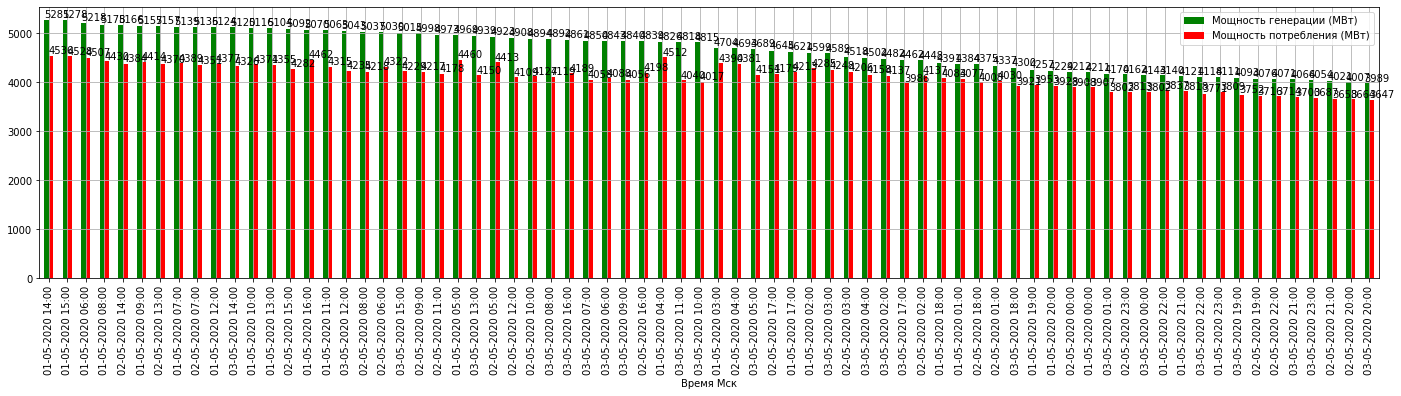

In [9]:
#[9] Построение гистограммы по данным
axes = df_power_freq.iloc[ : ,  : 2].plot(kind = 'bar', figsize=(24, 5), color = 'green,')

# Добавление точных значений каждому столбцу. Решение нестандартное, найдено на Stackoverflow по запросу "pandas bar plot with values"
for p in axes.patches:
    axes.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

axes.grid(True)

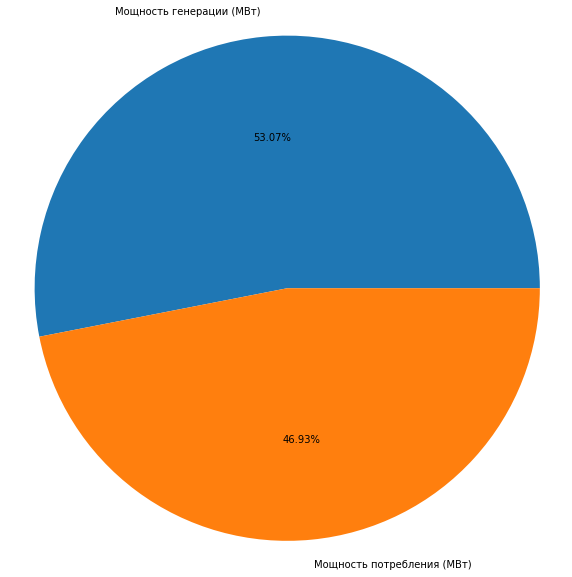

In [10]:
#[10] Построение круговой диаграммы по данным
power_matrix = df_power.values
generation_sum = (power_matrix[: , 0 : 2]).sum(axis = 0)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_power.columns[0 : 2]

fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(generation_sum, labels = labels, autopct = '%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
#[11] Построение интерактивного графика по данным

output_notebook() # чтобы график показывался прямо в блокноте

#Построение графика
p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(df_power)), df_power['Мощность генерации (МВт)'], line_width = 2)
p.line(np.arange(len(df_power)), df_power['Мощность потребления (МВт)'], line_width = 2, color = 'green')

show(p)